In [1]:
import pandas as pd
import numpy as np
# import dask.dataframe as dd # trying out parallelization library dask for saving memory. see: https://www.youtube.com/watch?v=CVL8sTXT714
import pywt
import nolds
import scipy
import meegkit
import time

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential # do these need to be tf.keras? review why
# from tensorflow.keras.layers import Dense, Conv1D, Conv2D 
# from sklearn.cross_decomposition import CCA 

In [5]:
from sklearn.model_selection import train_test_split

------------
## Importing cleaned and curated data
------------

In [2]:
!free -h

               total        used        free      shared  buff/cache   available
Mem:            15Gi       2.1Gi        10Gi       212Mi       3.0Gi        12Gi
Swap:          976Mi          0B       976Mi


In [3]:
baseline = pd.read_csv('baseline.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'baseline.csv'

In [7]:
!free -h # half my memory :thumbsup:

               total        used        free      shared  buff/cache   available
Mem:            15Gi       7.3Gi       4.3Gi       199Mi       3.9Gi       7.7Gi
Swap:          976Mi          0B       976Mi


In [11]:
baseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50696325 entries, 0 to 50696324
Data columns (total 5 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   event       int64 
 2   channel     object
 3   code        int64 
 4   data        object
dtypes: int64(3), object(2)
memory usage: 1.9+ GB


In [13]:
# baseDF['data'].astype('float', copy=False)

In [8]:
baseDF.head()

,Unnamed: 0,event,channel,code,data
0,0,67635,O1,6,4203.08
1,1,67635,O1,6,4193.33
2,2,67635,O1,6,4194.87
3,3,67635,O1,6,4207.18
4,4,67635,O1,6,4220.51


In [13]:
# !grep 'fef[1,2,3,4]\ =' workingNotebook.ipynb

    "# fef1 = emotiv[(emotiv['channel'] == 'F7')] = fefF7\n",
    "# fef2 = emotiv[(emotiv['channel'] == 'F8')] = fefF8\n",
    "# fef3 = emotiv[(emotiv['channel'] == 'FC5')] fefFC5\n",
    "# fef4 = emotiv[(emotiv['channel'] == 'FC6')] = fefFC6\n",


In [3]:
# occ0 = dd.read_csv('occ0Exp.csv')
# occ1 = dd.read_csv('occ1Exp.csv')
# fefF3 = dd.read_csv('fefF3Exp.csv' )
# fefF4 = dd.read_csv('fefF4Exp.csv' )
# fefF7 = dd.read_csv('fef1Exp.csv')
# fefF8 = dd.read_csv('fef2Exp.csv')
# fefFC5 = dd.read_csv('fef3Exp.csv')
# fefFC6 = dd.read_csv('fef4Exp.csv')

# for minimum model, O1 O2 F7 and F7 would probably give the most visual only info

# t1 = time.time()
# occ0 = pd.read_csv('occ0Exp.csv')
# t2 = time.time()
# print(t2-t1)
# t1 = time.time()
# occ1 = pd.read_csv('occ1Exp.csv')
# t2 = time.time()
# print(t2-t1)
# t1 = time.time()
# fefF3 = pd.read_csv('fefF3Exp.csv' )
# t2 = time.time()
# print(t2-t1)
# t1 = time.time()
# fefF4 = pd.read_csv('fefF4Exp.csv' )
# t2 = time.time()
# print(t2-t1)
# t1 = time.time()
# fefF7 = pd.read_csv('fef1Exp.csv')
# t2 = time.time()
# print(t2-t1)
# t1 = time.time()
# fefF8 = pd.read_csv('fef2Exp.csv')
# t2 = time.time()
# print(t2-t1)
# t1 = time.time()
# fefFC5 = pd.read_csv('fef3Exp.csv')
# t2 = time.time()
# print(t2-t1)
# t1 = time.time()
# fefFC6 = pd.read_csv('fef4Exp.csv')
# t2 = time.time()
# print(t2-t1)

25.862765550613403


In [5]:
# t1 = time.time()
# baseDF = pd.concat([occ0, occ1, fefF7, fefF8])
# t2 = time.time()
# print(t2-t1)

2.6884381771087646


In [10]:
!free -h

               total        used        free      shared  buff/cache   available
Mem:            15Gi       8.5Gi       3.2Gi       215Mi       3.9Gi       6.5Gi
Swap:          976Mi          0B       976Mi


In [14]:
# baseDF.columns

Index(['Unnamed: 0', 'id', 'event', 'channel', 'code', 'size', 'data'], dtype='object')

In [7]:
# baseDF.drop(['Unnamed: 0', 'size', 'id'], axis=1, inplace=True)

In [8]:
baseDF.to_csv('baseDF.csv')

In [16]:
# comparing pd and dd speeds for a mean func

# t1 = time.time()
# pandaocc0['data'].mean()
# t2 = time.time()
# print(t2-t1)
# t1 = time.time()
# occ0['data'].mean()
# t2 = time.time()
# print(t2-t1)
# t1 = time.time()
# occ0['data'].mean().compute()
# t2 = time.time()
# print(t2-t1)
# dask is way faster but needs a .compute() method which makes it slower?
# 0.07574987411499023
# 0.002901792526245117
# 1.4689276218414307

0.07574987411499023
0.002901792526245117
1.4689276218414307


In [18]:
# pandaocc0.__sizeof__(), occ0.__sizeof__() # this is the real proof of dask, occ0 is only 32 bytes???

(1805849507, 32)

In [6]:
!free -h

               total        used        free      shared  buff/cache   available
Mem:            15Gi       2.6Gi       6.1Gi       352Mi       6.8Gi        12Gi
Swap:          976Mi       2.0Mi       974Mi


In [6]:
# fefF3 = dd.read_csv('fefF3Exp.csv' )

In [8]:
# !free -h

In [8]:
# pandafefF3 = pd.read_csv('fefF3Exp.csv')

In [7]:
# !free -h

In [10]:
pandafefF3.__sizeof__(), fefF3.__sizeof__()

(1805849507, 32)

 Looking at a printout of the original occExp, checking to see if order is the same.
 Both head() and tail() show the same data order, so setting 'event' as index doesn't change the order of the data. 

```

id	event	channel	code	size	data
6	67641	67635	O1	6	260	4203.076923
6	67641	67635	O1	6	260	4193.333333
6	67641	67635	O1	6	260	4194.871794
6	67641	67635	O1	6	260	4207.179487
6	67641	67635	O1	6	260	4220.512820
...	...	...	...	...	...	...
910469	978104	132668	O2	-1	256	4215.384615
910469	978104	132668	O2	-1	256	4218.461538
910469	978104	132668	O2	-1	256	4212.820512
910469	978104	132668	O2	-1	256	4213.846153
910469	978104	132668	O2	-1	256	4222.564102
```


In [68]:
# import matplotlib.font_manager

In [91]:
# max(set(occExp.index)), min(set(occExp.index))
(132668 - 67635)

65033

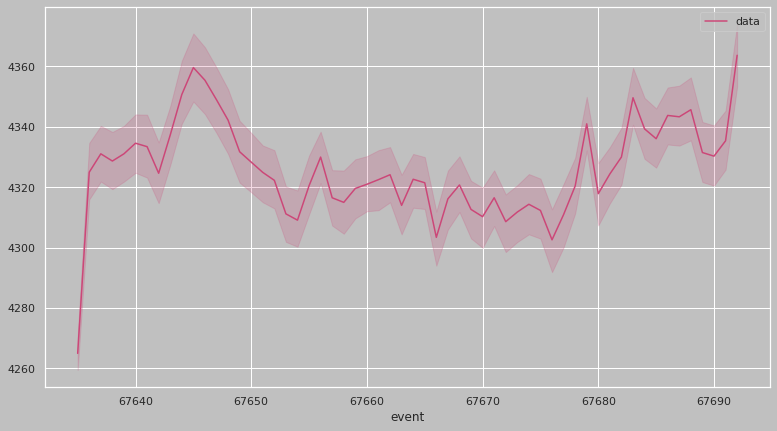

In [88]:
# fig, ax = plt.subplots(figsize=(13,7))
# sns.lineplot(data=occExp.drop('code', axis=1)[:30000], palette='plasma')
# # sns.set_theme(context='notebook', style='ticks', palette='deep', font='Calibri', font_scale=1)
# sns.set(rc={'axes.facecolor':'silver', 'figure.facecolor':'silver'})
# # 

<AxesSubplot:xlabel='event'>

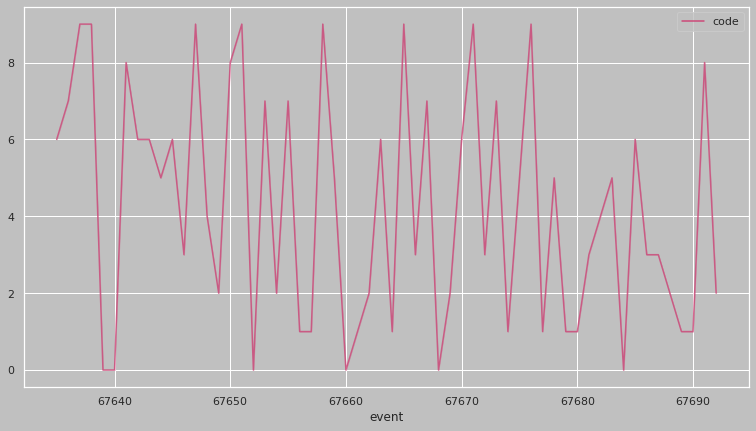

In [81]:
# # this plot shows how occipital activit is clustered by event
# # definite frequency value dips and spikes at certain event codes
# fig = plt.subplots(figsize=(13,7))
# sns.lineplot(data=occExp.drop('data', axis=1)[:30000], alpha=0.8, palette='plasma')

In [13]:
# occExp['data'][:4]

0    4203.076923
1    4193.333333
2    4194.871794
3    4207.179487
Name: data, dtype: float64

In [16]:
# looking at the range of amplitudes. FFT or WT gets frequency information from this 
# occExp['data']

<bound method IndexOpsMixin.value_counts of 0           4203.076923
1           4193.333333
2           4194.871794
3           4207.179487
4           4220.512820
               ...     
33754189    4215.384615
33754190    4218.461538
33754191    4212.820512
33754192    4213.846153
33754193    4222.564102
Name: data, Length: 33754194, dtype: float64>

In [40]:
# len(set(occExp['code'].values))

11

<AxesSubplot:>

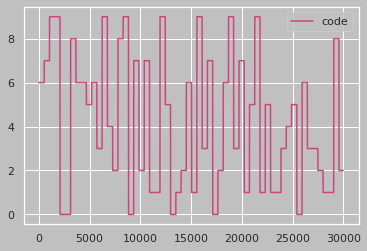

In [58]:
# sns.lineplot(data=occExp.drop(['event', 'id', 'data'], axis=1)[:30000], palette='plasma')

In [21]:
# occExp.groupby('event').count()

,id,channel,code,data
event,,,,
67635,520,520,520,520
67636,520,520,520,520
67637,512,512,512,512
67638,528,528,528,528
67639,520,520,520,520
...,...,...,...,...
132664,512,512,512,512
132665,512,512,512,512
132666,512,512,512,512


---------
Combining occ0, occ1, fefF3, fefF4, fefF7, fefF8, fefFC5, fefFC6 into one df

---------

In [5]:
baseDF = dd.concat([occ0, occ1, fefF3, fefF4, fefF7, fefF8, fefFC5, fefFC6], axis=0 ) # which axis?

In [22]:
# baseDF['data'].compute() # this brings it up to 11G/15.5 ram :(  118,204,713

0         4203.08
1         4193.33
2         4194.87
3         4207.18
4         4220.51
           ...   
790518    4254.87
790519     4264.1
790520    4248.21
790521     4244.1
790522    4255.38
Name: data, Length: 118204713, dtype: object

In [8]:
# baseDF = baseDF.drop(['size', 'id'], axis=1) # only .compute is RAM intensive
baseDF = baseDF.drop('Unnamed: 0', axis=1)

In [ ]:
# baseDF.set_index('event') #

--------------
## Baseline Model: Only Occipital, No Preprocessing
## Baseline+ : Basline+Preprocessing
--------------

&nbsp;


In [104]:
# XTrain, XTest, yTrain, yTest = train_test_split(occExp.drop('code'), occExp['code'] ) # do I need to set index to eventid?


In [100]:
model = Sequential()

# model.add(Conv1D(n, activation='relu'), input_dim=m, ) # or selu
# model.add(Conv1D(n, activation='relu'), input_dim=m, )
# model.add(Conv1D(n, activation='relu'), input_dim=m, )
# model.add(Dense(n, activation='softmax'), input_dim=m, )
# model.add(Dense(n, activation='softmax'), input_dim=m, )

In [102]:
!free -h

               total        used        free      shared  buff/cache   available
Mem:            15Gi       5.4Gi       4.6Gi       274Mi       5.5Gi       9.5Gi
Swap:          976Mi       589Mi       387Mi


--------------
### Preprocessing
--------------

&nbsp;

Wavelet transform is not ideal for neural data because it relies on windows of different sizes (see Mike X Cohen's youtube channel). Hilbert transform might be the better option
provide unique analytic signal from real value data, so you can calculate instantaneous properties of your data" -EstherExplains v=dy4OeAYqSqM 


HT gives amplitude and phase, so "energy-frequency-time distribution"
> 1, Fourier Transform real valued signal
> 2. Set Fourier coefficients of negative frequencies to zero so they cannot cancel out the imaginary part related to the positive frequencies during the inverse FT
> 3. Double the amplitude related to positive frequencies for energy conservation
> 4. Inverse Fourier transform to obtain the analytic (complex signal)

I think the phase info is in the complex domain though. 
```
Returns xandarray Analytic signal of x, of each 1-D array along axis
```

In [ ]:
# testing wavelet transform and ways to parse the data column
# pywt.cwt([row.split() for row in emotiv['data']], ) # this one returns array of coefs and an array of freqs 
# testCWT = scipy.signal.wavelets.cwt(dataColFlatFloat, wavelet=scipy.signal.ricker, widths=np.arange(1, 31) ) # this one just returns an NxM matrix, may lose info but could be easier to work with
# type(dataColFlat[3]) # data column is all string encoded, of course, it was one giant string of numbers periods and commas
# dataColFlatFloat = [float(i) for i in dataColFlat]
# pd.DataFrame(testCWT).plot() #freezes comp; reduce dimensionality first

In [ ]:
# nolds.corr_dim() 
# nolds.lyap_e() # just the exponents
# nolds.lyap_r() # oh here it is

In [ ]:
# with open('IN.txt') as f:
#     full = f.read()
# full[0:30000] # aahhh
# len(set(full)) # way more maneageable. there are 14 channels, 21 unique values
# len(full)

In [ ]:
# # full.find('O1') # is it not there?
# # full[-1]  # I think this is the mindwave one oops 
# with open('./EP1.01.txt') as g:
#     epoc = g.read() 

In [ ]:
# # epoc.find('O1') # yay it's there 18881
# # epoc.find('O2') # yay it's there 22025
# epoc.split()[:4000] # what's the best way to parse this into a df? loop like fizzbuzz? 

 Power Spectrum Decomposition

In [ ]:
scipy.signal.periodogram()

Wavelet transform is not ideal for neural data because it relies on windows of different sizes (see Mike X Cohen's youtube channel). Hilbert transform might be the better option
provide unique analytic signal from real value data, so you can calculate instantaneous properties of your data" -EstherExplains v=dy4OeAYqSqM 


HT gives amplitude and phase, so "energy-frequency-time distribution"
> 1, Fourier Transform real valued signal
> 2. Set Fourier coefficients of negative frequencies to zero so they cannot cancel out the imaginary part related to the positive frequencies during the inverse FT
> 3. Double the amplitude related to positive frequencies for energy conservation
> 4. Inverse Fourier transform to obtain the analytic (complex signal)

I think the phase info is in the complex domain though. 
```
Returns xandarray Analytic signal of x, of each 1-D array along axis
```
